In [1]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

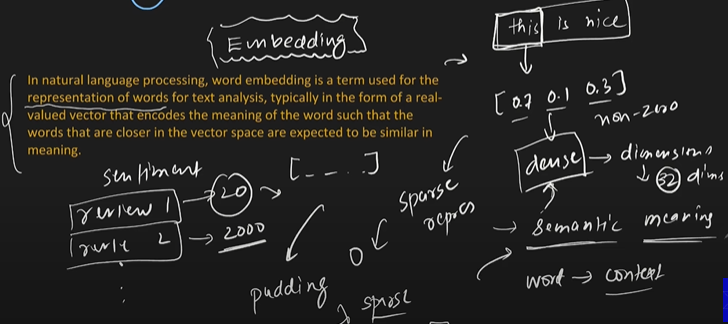

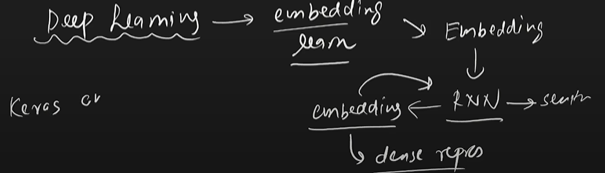

In [49]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [51]:
tokenizer.fit_on_texts(docs)

In [52]:
tokenizer.word_index

{'india': 1,
 'jeetega': 2,
 'hip': 3,
 'ki': 4,
 'jai': 5,
 'kohli': 6,
 'sachin': 7,
 'dhoni': 8,
 'go': 9,
 'hurray': 10,
 'bhai': 11,
 'bharat': 12,
 'mata': 13,
 'modi': 14,
 'ji': 15,
 'inquilab': 16,
 'zindabad': 17}

In [53]:
len(tokenizer.word_index)

17

In [54]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [55]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]], dtype=int32)

In [56]:
sequences.shape # input length

(10, 5)

In [57]:
model2 = Sequential()

In [42]:
# # Ensure input data is within vocabulary range
# x_train = np.clip(x_train, 0, vocab_size - 1)

# # Validate embedding layer configuration
# embedding_layer = Embedding(
#     input_dim=vocab_size,
#     output_dim=embedding_dim,
#     input_length=sequence_length,
#     trainable=True,
# )

In [58]:
model2.add(Embedding(input_dim=18,output_dim=2,input_length=5))  #len(tokenizer.word_index) ==17 input dim = vocab size 17 + 1( for pading 0)

In [69]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (10, 5, 2)             │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

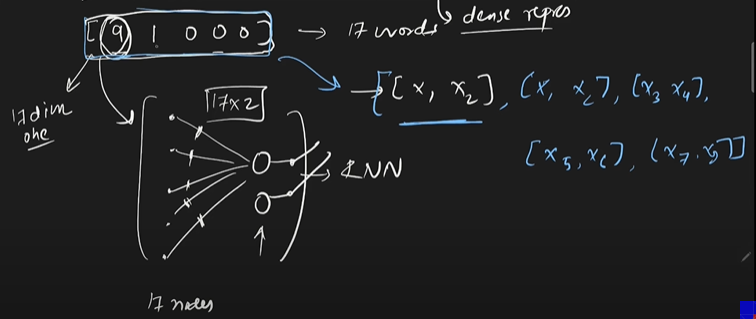

In [59]:
model2.compile('adam','accuracy')

In [60]:
pred = model2.predict(sequences)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
[[[-3.2200776e-02 -1.4074016e-02]
  [-3.9620496e-02 -6.9905035e-03]
  [ 2.0517018e-02  2.4532307e-02]
  [ 2.0517018e-02  2.4532307e-02]
  [ 2.0517018e-02  2.4532307e-02]]

 [[-3.9620496e-02 -6.9905035e-03]
  [-3.9620496e-02 -6.9905035e-03]
  [ 2.0517018e-02  2.4532307e-02]
  [ 2.0517018e-02  2.4532307e-02]
  [ 2.0517018e-02  2.4532307e-02]]

 [[ 1.5789103e-02  4.1821156e-02]
  [ 1.5789103e-02  4.1821156e-02]
  [ 3.7406508e-02 -4.0122412e-02]
  [ 2.0517018e-02  2.4532307e-02]
  [ 2.0517018e-02  2.4532307e-02]]

 [[-2.4278188e-02  6.8719983e-03]
  [ 4.5111630e-02 -2.7253890e-02]
  [-2.4278188e-02  6.8719983e-03]
  [-3.9620496e-02 -6.9905035e-03]
  [-2.4278188e-02  6.8719983e-03]]

 [[-1.7268434e-03 -3.2788027e-02]
  [-3.8534354e-02  2.2921156e-02]
  [ 4.6720434e-02  5.1349401e-03]
  [ 1.8617902e-02  4.6714853e-02]
  [ 2.0517018e-02  2.4532307e-02]]

 [[ 3.7532661e-02  4.0467110e-02]
  [ 3.7532661e-02  4.0467110e-02]
  [ 2.0517018e-02  2.4532307e-02]

In [1]:
x=2

In [ ]:
#                       9> [-3.2200776e-02 -1.4074016e-02]
#                       1> [-3.9620496e-02 -6.9905035e-03]
# [ 9,  1,  0,  0,  0]==0> [ 2.0517018e-02  2.4532307e-02]
#                       0> [ 2.0517018e-02  2.4532307e-02]
#                       0> [ 2.0517018e-02  2.4532307e-02]



#        [ 1,  1,  0,  0,  0],
#        [ 3,  3, 10,  0,  0],
#        [ 2, 11,  2,  1,  2],
#        [12, 13,  4,  5,  0],
#        [ 6,  6,  0,  0,  0],
#        [ 7,  7,  0,  0,  0],
#        [ 8,  8,  0,  0,  0],
#        [14, 15,  4,  5,  0],
#        [16, 17,  0,  0,  0]]

In [2]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

In [4]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)  # trim upto 50 words , padding added after actual words
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [11]:
X_train.shape

(25000, 50)

In [12]:
model3 = Sequential()
model3.add(Embedding(input_dim=10000, output_dim=2, input_length=50))


model3.add(SimpleRNN(32,return_sequences=False)) # 32 no of neuron
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [14]:
history = model3.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/embedding_1_1/GatherV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\asyncio\base_events.py", line 608, in run_forever

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\asyncio\events.py", line 84, in _run

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\lenovo\AppData\Local\Temp\ipykernel_2092\2051596044.py", line 1, in <module>

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\models\sequential.py", line 213, in call

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\models\functional.py", line 182, in call

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\models\functional.py", line 584, in call

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\layers\core\embedding.py", line 140, in call

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\ops\numpy.py", line 5206, in take

  File "d:\a27_YEARS_OLD\RNN_GRU_LSTM_TRANSFORMER\venv\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 2029, in take

indices[1,1] = 54843 is not in [0, 16751)
	 [[{{node sequential_1_1/embedding_1_1/GatherV2}}]] [Op:__inference_one_step_on_iterator_4622]

many to one

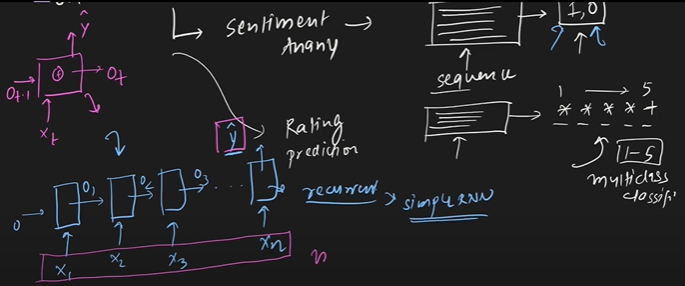

one to many

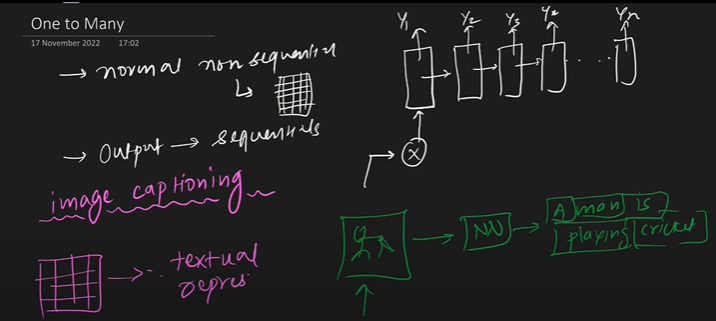

many to many

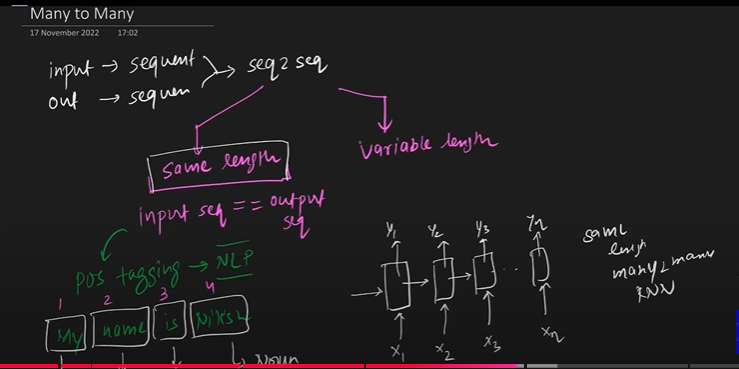

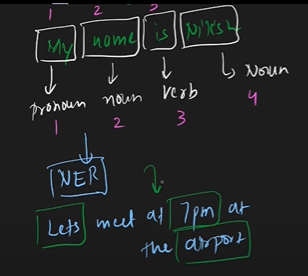 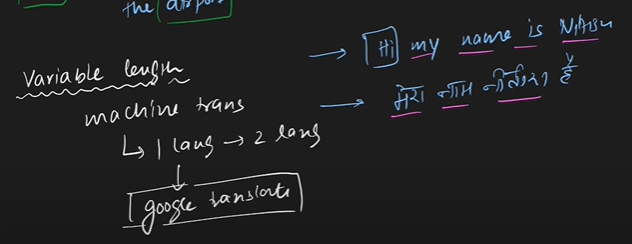

NEP == name entity recognition

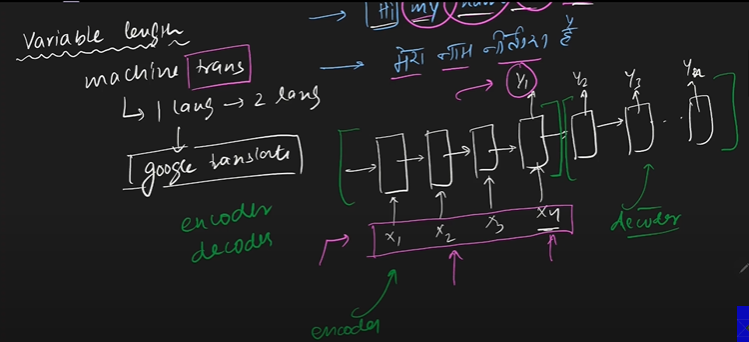